In [313]:
# Importing Libraries 
import copy, math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [314]:
# Importing the data using pandas
df = pd.read_csv("Social_Network_Ads.csv")
print(df.head())
print(df.shape)

   Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0
(400, 3)


In [315]:
# Splitting the features from the dataset
x = df.iloc[:,:-1].values
print(x[:5])
print(x.shape)

[[   19 19000]
 [   35 20000]
 [   26 43000]
 [   27 57000]
 [   19 76000]]
(400, 2)


In [316]:
# Splitting the targets from the dataset
y = df.iloc[:,-1].values
y = y.reshape(-1,1)
print(y[:5])
print(y.shape)

[[0]
 [0]
 [0]
 [0]
 [0]]
(400, 1)


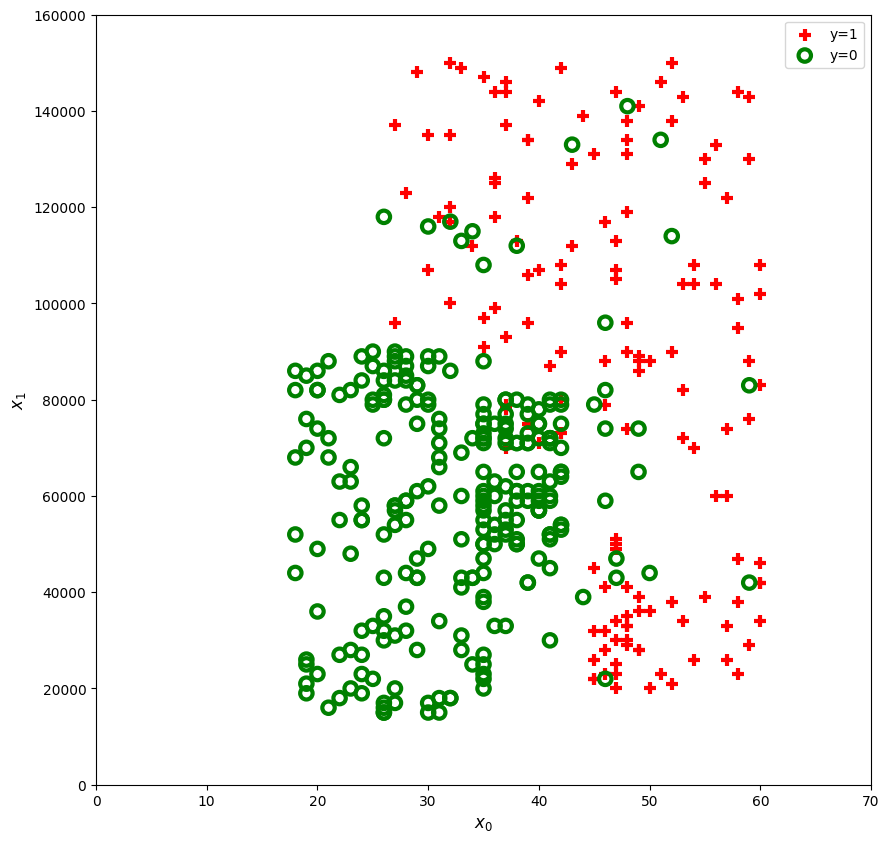

In [317]:
# Plotting the complete dataset
fig,ax = plt.subplots(1,1,figsize=(10,10))
pos = y == 1
neg = y == 0
pos = pos.reshape(-1,)  #work with 1D or 1D y vectors
neg = neg.reshape(-1,)

# Plot examples
ax.scatter(x[pos, 0], x[pos, 1], marker='+', s=80, c = 'red', label="y=1", lw=3)
ax.scatter(x[neg, 0], x[neg, 1], marker='o', s=80, label="y=0", facecolors='none', edgecolors="green", lw=3)
ax.legend(loc="best")

ax.axis([0, 70, 0, 160000])
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)
plt.show()

In [318]:
# Scaling Dataset Values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_norm = scaler.fit_transform(x)
print(x_norm[:2])
print(x_norm.shape)


[[-1.78179743 -1.49004624]
 [-0.25358736 -1.46068138]]
(400, 2)


In [319]:
# Splitting the Dataset into 80-20 ratio
x_train, x_test = x_norm[:320,:], x_norm[320:,:]
print(x_train.shape)
print(x_test.shape)


(320, 2)
(80, 2)


In [320]:
y_train, y_test = y[:320,:], y[320:,:]
print(y_train.shape)
print(y_test.shape)

(320, 1)
(80, 1)


In [321]:
# Calculating the value of z
def sigmoid(z):

    g = 1/(1+np.exp(-z))
   
    return g

In [322]:
# Calculating the cost of the logistic function
def compute_cost_logistic(X, y, w, b):

    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i],w)+ b
        f_wb_i = sigmoid(z_i)
        cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)
             
    cost = cost / m
    return cost

In [323]:
# Calculating the partial derivative terms of the logistic function
def compute_gradient_logistic(X, y, w, b): 

    m,n = X.shape
    dj_dw = np.zeros((n,))                           
    dj_db = 0.

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w)+ b)          
        err_i  = f_wb_i  - y[i]                       
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]      
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m                                   
    dj_db = dj_db/m                                   
        
    return dj_db, dj_dw  

In [324]:
# Calculating the complete gradient descent value
def gradient_descent(X, y, w_in, b_in, alpha, num_iters): 

    J_history = []
    w = copy.deepcopy(w_in)  
    b = b_in
    for i in range(num_iters):
        
        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b)   

        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               

        if i<100000:      
            J_history.append( compute_cost_logistic(X, y, w, b) )

        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")
        
    return w, b, J_history  


In [325]:
#Calculating the logistic regression
w_tmp  = np.zeros_like(x_train[0])
b_tmp  = 0.
alph = 0.1
iters = 1000

w_out, b_out, J_hist = gradient_descent(x_train, y_train, w_tmp, b_tmp, alph, iters) 
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

Iteration    0: Cost [0.67607059]   
Iteration  100: Cost [0.36021658]   
Iteration  200: Cost [0.33992468]   
Iteration  300: Cost [0.3348867]   
Iteration  400: Cost [0.33316877]   
Iteration  500: Cost [0.332496]   
Iteration  600: Cost [0.33221234]   
Iteration  700: Cost [0.33208743]   
Iteration  800: Cost [0.33203091]   
Iteration  900: Cost [0.33200488]   

updated parameters: w:[1.91787173 1.27642576], b:[-1.21948223]


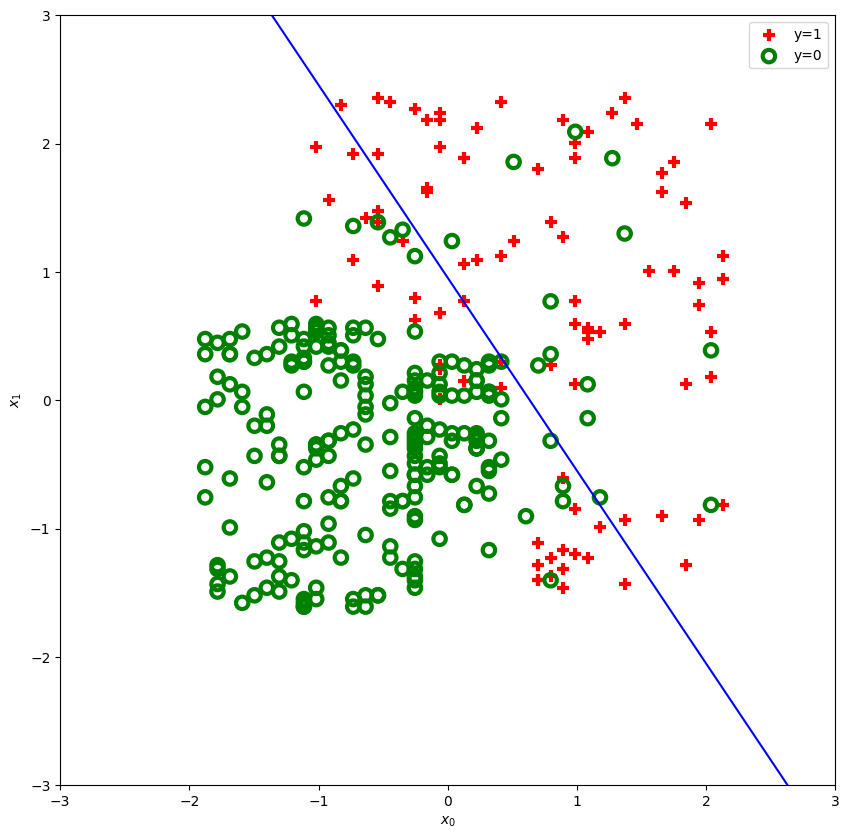

In [326]:
# Choose values between 0 and 6
x0 = np.arange(-5,5)

x1 = (-b_out - (x0*w_out[0]))/w_out[1]

fig,ax = plt.subplots(1,1,figsize=(10,10))
pos = y_train == 1
neg = y_train == 0
pos = pos.reshape(-1,) 
neg = neg.reshape(-1,)
ax.scatter(x_train[pos, 0], x_train[pos, 1], marker='+', s=80, c = 'red', label="y=1", lw=3)
ax.scatter(x_train[neg, 0], x_train[neg, 1], marker='o', s=80, label="y=0", facecolors='none', edgecolors="green", lw=3)
ax.plot(x0,x1, c="b")
ax.legend(loc="best")
ax.axis([-3, 3, -3, 3])
ax.set_ylabel(r'$x_1$')
ax.set_xlabel(r'$x_0$')
plt.show()

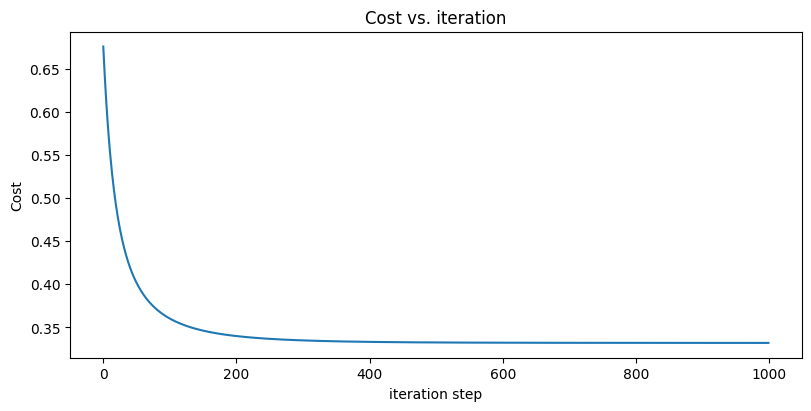

In [327]:
# Plotting Cost Vs. iteration
fig, ax1 = plt.subplots(1, 1, constrained_layout=True, figsize=(8, 4))
ax1.plot(J_hist)
ax1.set_title("Cost vs. iteration")
ax1.set_ylabel('Cost')             
ax1.set_xlabel('iteration step')   
plt.show()

In [337]:
# Finding accuracy of the model
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train.reshape(320))
print(lr_model.score(x_test, y_test))

0.75


In [342]:
# Checking the predictions
y_pred = lr_model.predict(x_test)

print(y_pred)

[1 1 0 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1
 0 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1
 0 0 0 0 0 0]


In [341]:
# Comparing to actual test values
print(y_test.reshape(1,-1))

[[1 1 0 1 1 0 0 0 1 1 0 1 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1
  1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1
  1 1 0 1 1 1 0 1]]


In [344]:
# Validating the weight and bias values
print(lr_model.coef_)
print(lr_model.intercept_)

[[1.80091351 1.20990896]]
[-1.19205086]


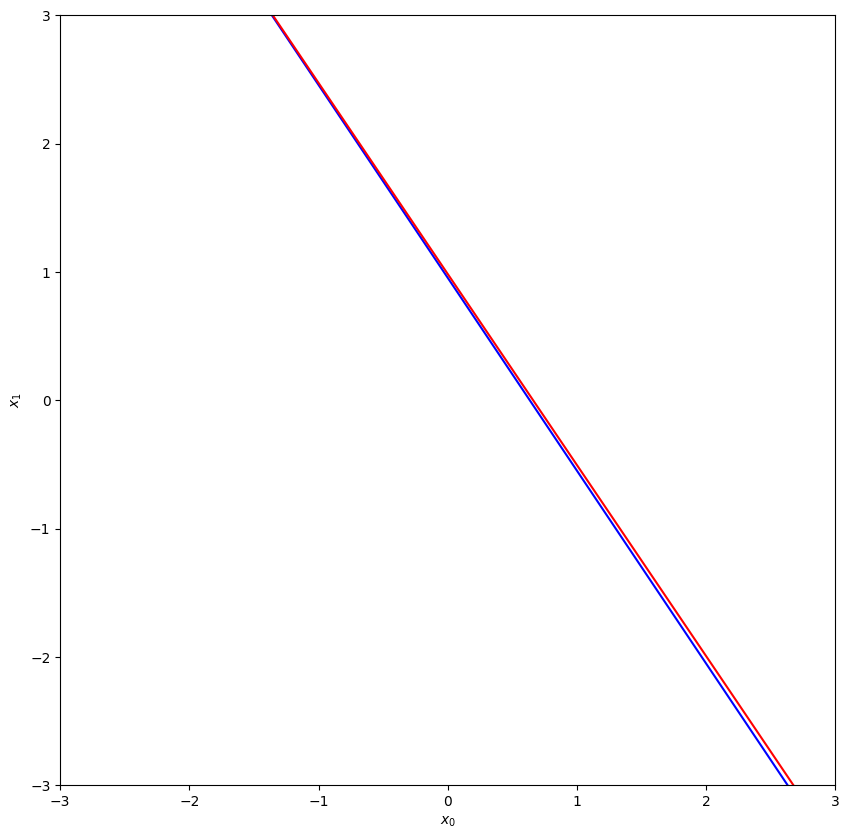

In [347]:
# Plotting both the decision boundaries to compare the models.
x0 = np.arange(-5,5)
x1 = (-b_out - (x0*w_out[0]))/w_out[1]
x2 = np.arange(-5,5)
a = lr_model.intercept_
k = lr_model.coef_
x3 = (-a- (x0*k[0][0]))/k[0][1]

fig,ax = plt.subplots(1,1,figsize=(10,10))
ax.plot(x0,x1, c="b")
ax.plot(x2,x3, c="r")
ax.axis([-3, 3, -3, 3])
ax.set_ylabel(r'$x_1$')
ax.set_xlabel(r'$x_0$')
plt.show()